<h1>Job outcomes of colege graduates between 2010 and 2012</h1>

To demonstrate my abilites in data visualisation we will be working with a dataset on the job outcomes of students who graduated from college between 2010 and 2012. The original data on job outcomes was released by American Community Survey, which conducts surveys and aggregates the data. FiveThirtyEight cleaned the dataset and released it on their Github repo.

Each row in the dataset represents a different major in college and contains information on gender diversity, employment rates, median salaries, and more. Here are some of the columns in the dataset:

    Rank - Rank by median earnings (the dataset is ordered by this column).
    Major_code - Major code.
    Major - Major description.
    Major_category - Category of major.
    Total - Total number of people with major.
    Sample_size - Sample size (unweighted) of full-time.
    Men - Male graduates.
    Women - Female graduates.
    ShareWomen - Women as share of total.
    Employed - Number employed.
    Median - Median salary of full-time, year-round workers.
    Low_wage_jobs - Number in low-wage service jobs.
    Full_time - Number employed 35 hours or more.
    Part_time - Number employed less than 36 hours.

Using visualizations, we can start to explore questions from the dataset like:

    Do students in more popular majors make more money?
        Using scatter plots
    How many majors are predominantly male? Predominantly female?
        Using histograms
    Which category of majors have the most students?
        Using bar plots

We'll explore how to do these and more while primarily working in pandas. Before we start creating data visualizations, let's import the libraries we need and remove rows containing null values. 

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
recent_grads = pd.read_csv('recent-grads.csv')
recent_grads.iloc[0]

Rank                                        1
Major_code                               2419
Major                   PETROLEUM ENGINEERING
Total                                    2339
Men                                      2057
Women                                     282
Major_category                    Engineering
ShareWomen                           0.120564
Sample_size                                36
Employed                                 1976
Full_time                                1849
Part_time                                 270
Full_time_year_round                     1207
Unemployed                                 37
Unemployment_rate                   0.0183805
Median                                 110000
P25th                                   95000
P75th                                  125000
College_jobs                             1534
Non_college_jobs                          364
Low_wage_jobs                             193
Name: 0, dtype: object

In [4]:
recent_grads.head(2)

,Rank,Major_code,Major,Total,Men,Women,Major_category,ShareWomen,Sample_size,Employed,...,Part_time,Full_time_year_round,Unemployed,Unemployment_rate,Median,P25th,P75th,College_jobs,Non_college_jobs,Low_wage_jobs
0,1,2419,PETROLEUM ENGINEERING,2339.0,2057.0,282.0,Engineering,0.120564,36,1976,...,270,1207,37,0.018381,110000,95000,125000,1534,364,193
1,2,2416,MINING AND MINERAL ENGINEERING,756.0,679.0,77.0,Engineering,0.101852,7,640,...,170,388,85,0.117241,75000,55000,90000,350,257,50


In [5]:
recent_grads.tail(2)

,Rank,Major_code,Major,Total,Men,Women,Major_category,ShareWomen,Sample_size,Employed,...,Part_time,Full_time_year_round,Unemployed,Unemployment_rate,Median,P25th,P75th,College_jobs,Non_college_jobs,Low_wage_jobs
171,172,5203,COUNSELING PSYCHOLOGY,4626.0,931.0,3695.0,Psychology & Social Work,0.798746,21,3777,...,965,2738,214,0.053621,23400,19200,26000,2403,1245,308
172,173,3501,LIBRARY SCIENCE,1098.0,134.0,964.0,Education,0.877960,2,742,...,237,410,87,0.104946,22000,20000,22000,288,338,192


In [6]:
recent_grads.describe()

,Rank,Major_code,Total,Men,Women,ShareWomen,Sample_size,Employed,Full_time,Part_time,Full_time_year_round,Unemployed,Unemployment_rate,Median,P25th,P75th,College_jobs,Non_college_jobs,Low_wage_jobs
count,173.000000,173.000000,172.000000,172.000000,172.000000,172.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000
mean,87.000000,3879.815029,39370.081395,16723.406977,22646.674419,0.522223,356.080925,31192.763006,26029.306358,8832.398844,19694.427746,2416.329480,0.068191,40151.445087,29501.445087,51494.219653,12322.635838,13284.497110,3859.017341
std,50.084928,1687.753140,63483.491009,28122.433474,41057.330740,0.231205,618.361022,50675.002241,42869.655092,14648.179473,33160.941514,4112.803148,0.030331,11470.181802,9166.005235,14906.279740,21299.868863,23789.655363,6944.998579
min,1.000000,1100.000000,124.000000,119.000000,0.000000,0.000000,2.000000,0.000000,111.000000,0.000000,111.000000,0.000000,0.000000,22000.000000,18500.000000,22000.000000,0.000000,0.000000,0.000000
25%,44.000000,2403.000000,4549.750000,2177.500000,1778.250000,0.336026,39.000000,3608.000000,3154.000000,1030.000000,2453.000000,304.000000,0.050306,33000.000000,24000.000000,42000.000000,1675.000000,1591.000000,340.000000
50%,87.000000,3608.000000,15104.000000,5434.000000,8386.500000,0.534024,130.000000,11797.000000,10048.000000,3299.000000,7413.000000,893.000000,0.067961,36000.000000,27000.000000,47000.000000,4390.000000,4595.000000,1231.000000
75%,130.000000,5503.000000,38909.750000,14631.000000,22553.750000,0.703299,338.000000,31433.000000,25147.000000,9948.000000,16891.000000,2393.000000,0.087557,45000.000000,33000.000000,60000.000000,14444.000000,11783.000000,3466.000000
max,173.000000,6403.000000,393735.000000,173809.000000,307087.000000,0.968954,4212.000000,307933.000000,251540.000000,115172.000000,199897.000000,28169.000000,0.177226,110000.000000,95000.000000,125000.000000,151643.000000,148395.000000,48207.000000


In [7]:
raw_data_count = len(recent_grads)
recent_grads = recent_grads.dropna()
clean_data_count = len(recent_grads)
print(raw_data_count, clean_data_count)

173 172


There was only one row that needed dropping

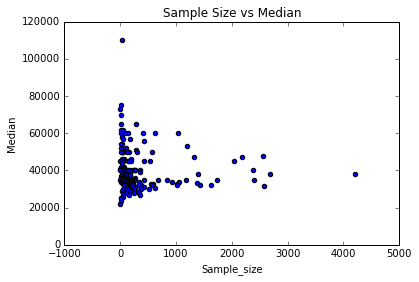

In [8]:
ax1 = recent_grads.plot(x='Sample_size', y='Median', kind='scatter')
ax1.set_title('Sample Size vs Median')

The graph shows that the popularity of a course does not correlate well with earning potential. With the distribution of median income reducing as the sample size increases

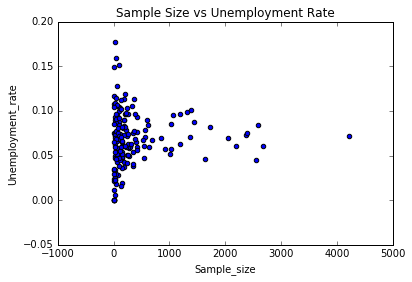

In [9]:
ax2 = recent_grads.plot(x='Sample_size', y='Unemployment_rate', kind='scatter')
ax2.set_title('Sample Size vs Unemployment Rate')

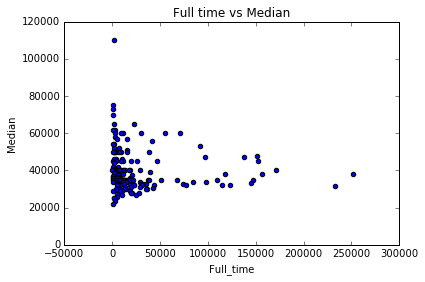

In [10]:
ax3 = recent_grads.plot(x='Full_time', y='Median', kind='scatter')
ax3.set_title('Full time vs Median')

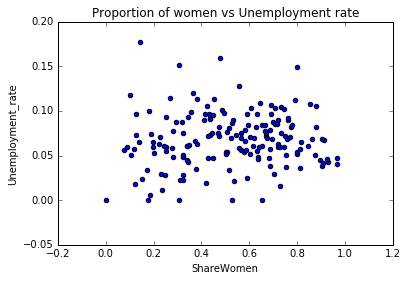

In [11]:
ax4 = recent_grads.plot(x='ShareWomen', y='Unemployment_rate', kind='scatter')
ax4.set_title('Proportion of women vs Unemployment rate')

The proporation of women on a course does not seem to effect employment rates

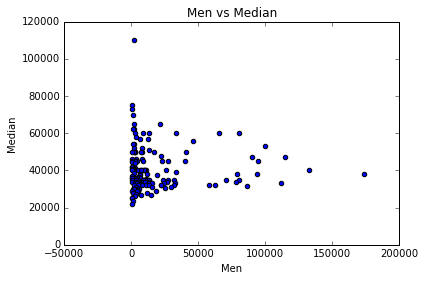

In [12]:
ax5 = recent_grads.plot(x='Men', y='Median', kind='scatter')
ax5.set_title('Men vs Median')

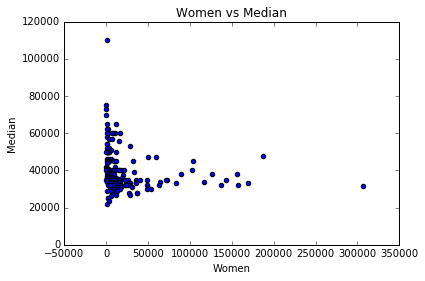

In [13]:
ax4 = recent_grads.plot(x='Women', y='Median', kind='scatter')
ax4.set_title('Women vs Median')

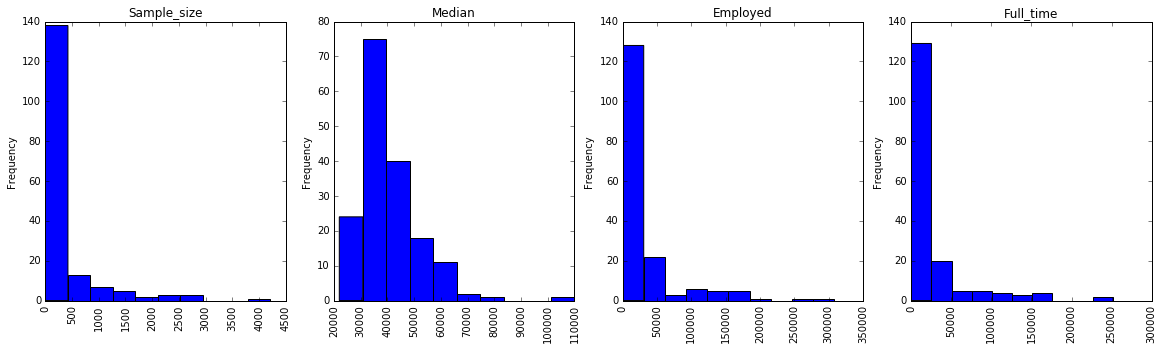

In [20]:
cols = [
    'Sample_size',
    'Median',
    'Employed',
    'Full_time',
    'ShareWomen',
    'Unemployment_rate',
    'Men',
    'Women']
fig = plt.figure(figsize=(25,5))
for i in range(1,5):
    ax = fig.add_subplot(1,5,i)
    ax = recent_grads[cols[i-1]].plot(kind='hist', rot=90)
    ax.set_title(cols[i-1])

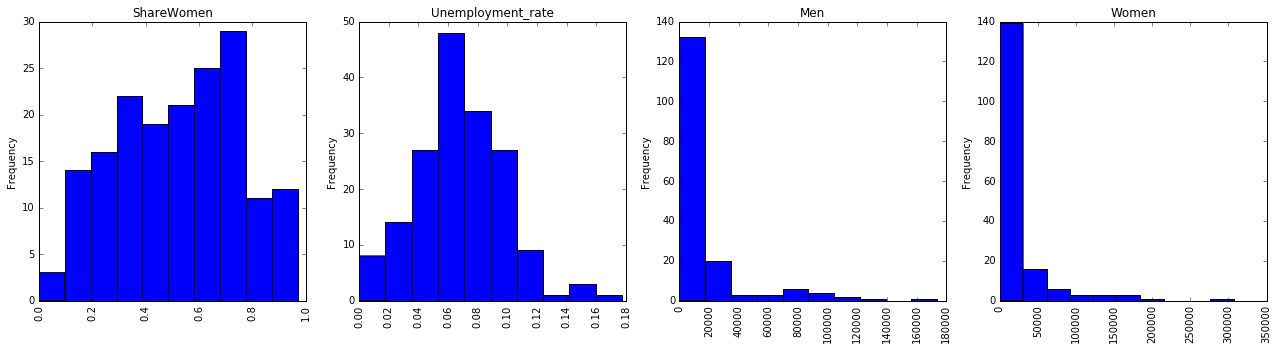

In [15]:
fig = plt.figure(figsize=(22,5))
for i in range(4,8):
    ax = fig.add_subplot(1,4,i-3)
    ax = recent_grads[cols[i]].plot(kind='hist', rot=90)
    ax.set_title(cols[i])

So the histograms above give us some information. For example we can see that the median income falls within a range of 30000 to 40000.
The unemployment rate across majors follows what is almost a normal distribution within a range of 0% and 18%, with the median being 6%.

Above I created individual scatter plots to visualize potential relationships between columns and histograms to visualize the distributions of individual columns. A scatter matrix plot combines both scatter plots and histograms into one grid of plots and allows us to explore potential relationships and distributions simultaneously. A scatter matrix plot consists of n by n plots on a grid, where n is the number of columns, the plots on the diagonal are histograms, and the non-diagonal plots are scatter plots.

In [22]:
from pandas.tools.plotting import scatter_matrix 

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fd6d3f1c908>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x7fd6d3e54c50>]], dtype=object)

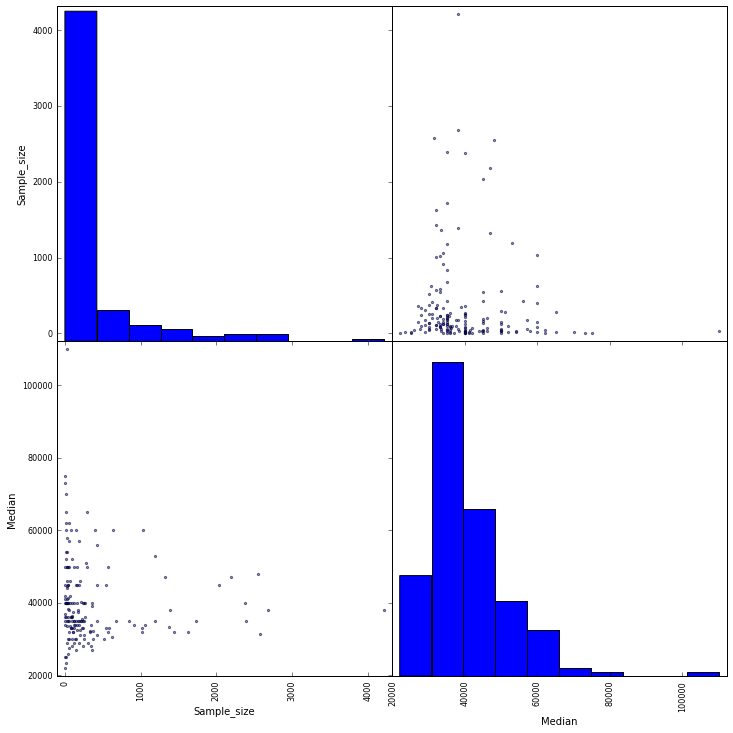

In [29]:
scatter_matrix(recent_grads[['Sample_size', 'Median']], figsize=(12,12))

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fd6d3e91898>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x7fd6d3b134e0>]], dtype=object)

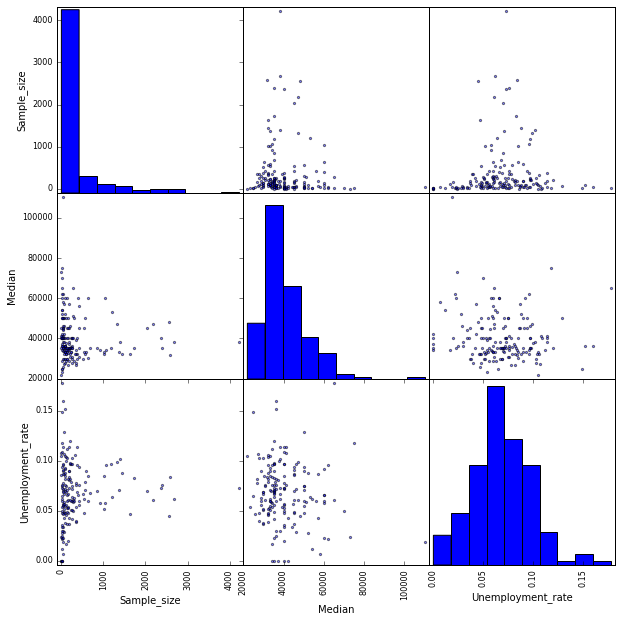

In [30]:
scatter_matrix(recent_grads[['Sample_size','Median', 'Unemployment_rate']], figsize=(10,10))

To create bar plots in matplotlib, we had to specify many aspects of the bar plot ourselves. We had to specify the locations, labels, lengths, and widths of the bars. When creating bar plots using pandas, we only need specify the data we want the bars to represent and the labels for each bar. The following code returns a bar plot of the first 5 values in the Women column:

recent_grads[:5]['Women'].plot(kind='bar')

By default, pandas will use the default labels on the x-axis for each bar (1 to n) from matplotlib. If we instead use the DataFrame.plot.bar() method, we can use the x parameter to specify the labels and the y parameter to specify the data for the bars:

recent_grads[:5].plot.bar(x='Major', y='Women')

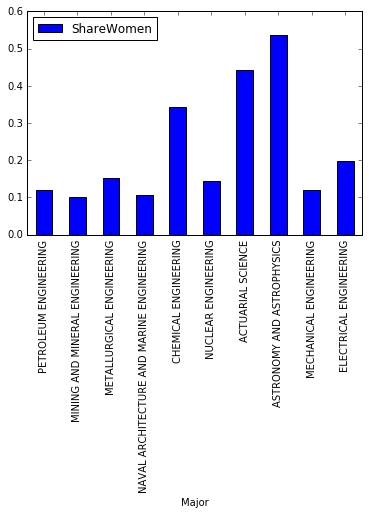

In [32]:
recent_grads[:10].plot.bar(x='Major', y='ShareWomen')

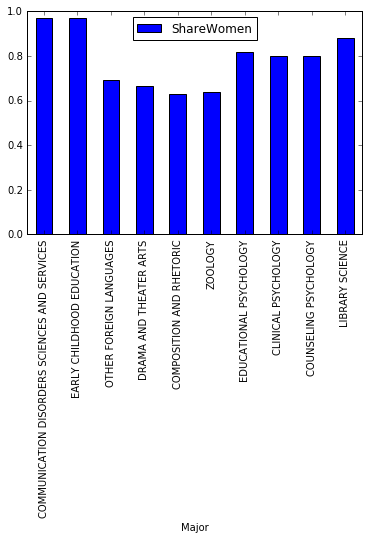

In [34]:
recent_grads[len(recent_grads)-10:].plot.bar(x='Major', y='ShareWomen')

These comparisons above clearly show that degrees with lower median income are majoritably taken by women, whereas Majors that result in higher paying careers have a female share of less than 50%